            meantempm  maxtempm  mintempm  meantempm_1  meantempm_2  \
2017-08-05         28        33        23         28.0         26.0   
2017-08-06         29        33        25         28.0         28.0   
2017-08-07         29        32        26         29.0         28.0   
2017-08-08         28        31        24         29.0         29.0   
2017-08-09         28        31        24         28.0         29.0   

            meantempm_3  meandewptm_1  meandewptm_2  meandewptm_3  \
2017-08-05         27.0          23.0          23.0          24.0   
2017-08-06         26.0          22.0          23.0          23.0   
2017-08-07         28.0          23.0          22.0          23.0   
2017-08-08         28.0          24.0          23.0          22.0   
2017-08-09         29.0          26.0          24.0          23.0   

            meanpressurem_1  ...  mindewptm_3  maxpressurem_1  maxpressurem_2  \
2017-08-05          1000.49  ...         23.0          1003.0          1004.0

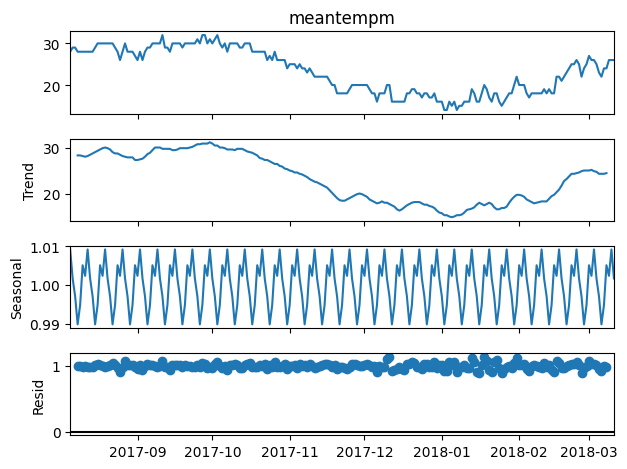

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

# Read the MaunaLoaDailyTemps dataset 
df = pd.read_csv('Arima_data.csv', 
                       index_col ='date', 
                       parse_dates = True) 

# Create a new DataFrame with the DateTimeIndex set correctly
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
new_index_df = pd.DataFrame(index=date_range)

# Merge the new DataFrame with the existing one
df = new_index_df.join(df)

# Handle missing values by forward fill
df['meantempm'].fillna(method='ffill', inplace=True)

# Print the first five rows of the dataset 
print(df.head()) 

# ETS plot  
result.plot()
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df['meantempm'])

# Extract and print results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpret results
if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.3907538897445058
p-value: 0.5867007051890609
Critical Values:
   1%: -3.4609922013325267
   5%: -2.875015740963014
   10%: -2.5739524288408777
The series is not stationary.


In [24]:
if adf_result[1] > 0.05:
    # Compute first-order difference
    df['diff_meantempm'] = df['meantempm'].diff()
    
    # Drop the first NaN value resulting from differencing
    df.dropna(inplace=True)
    
    # Check the stationarity of the differenced series
    adf_result_diff = adfuller(df['diff_meantempm'])
    
    # Print ADF test results for the differenced series
    print('\nAfter differencing:')
    print('ADF Statistic:', adf_result_diff[0])
    print('p-value:', adf_result_diff[1])
    print('Critical Values:')
    for key, value in adf_result_diff[4].items():
        print(f'   {key}: {value}')

    # Interpret ADF test results for the differenced series
    if adf_result_diff[1] <= 0.05:
        print("The differenced series is stationary.")
    else:
        print("The differenced series is still not stationary.")


After differencing:
ADF Statistic: -12.853569640347025
p-value: 5.289743279710744e-24
Critical Values:
   1%: -3.4609922013325267
   5%: -2.875015740963014
   10%: -2.5739524288408777
The differenced series is stationary.


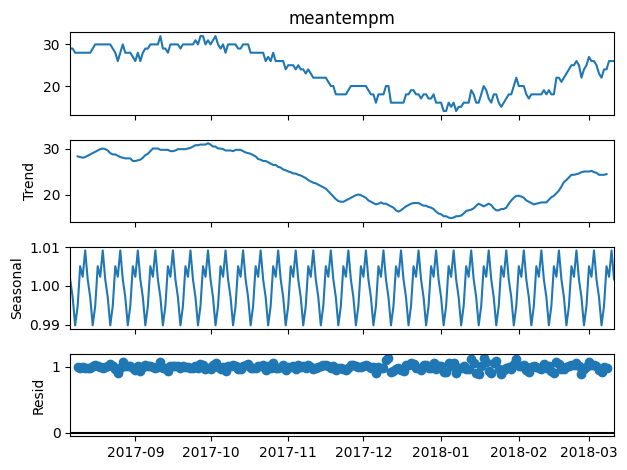

In [25]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame containing the time series data
result = seasonal_decompose(df['meantempm'], model='multiplicative')

# Plotting the decomposed components
result.plot()
plt.show()


In [26]:
# Import the library
from pmdarima import auto_arima
import pandas as pd

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to YOUR dataset
stepwise_fit = auto_arima(df['meantempm'], m=12, seasonal=True, 
                          d=None, D=1, trace=True, 
                          error_action='ignore', suppress_warnings=True, 
                          stepwise=True)

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=797.322, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=716.837, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=791.822, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=705.848, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=708.971, Time=0.28 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=702.191, Time=0.50 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=713.938, Time=0.20 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.11 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=703.410, Time=0.59 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=699.281, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  218
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -343.681
Date:                             Tue, 30 Apr 2024   AIC                            697.362
Time:                                     01:05:25   BIC                            713.977
Sample:                                 08-06-2017   HQIC                           704.082
                                      - 03-11-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5813      0.135      4.299      0.000       0.316       0.846
ma.L1         -0.8117      0.104     -7.783      0.000      -1.016      -0.607
ar.S.L12      -0.7335      0.070    -10.537      0.000      -0.870      -0.597
ar.S.L24      -0.2751      0.074     -3.705      0.000      -0.421      -0.130
sigma2         1.6173      0.154     10.507      0.000       1.316       1.919
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.93   Prob(JB):                         0.30
Heteroskedasticity (H):               1.45   Skew:                             0.26
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

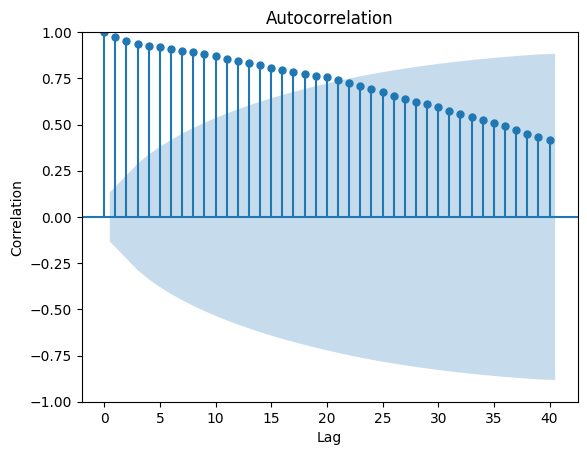

In [27]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plot_acf(df['meantempm'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [28]:
# Calculate the length of the dataset
total_length = len(df)

# Calculate the index to split the data
split_index = int(0.9 * total_length)
 
train = df.iloc[:split_index] 
test = df.iloc[split_index:]

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['meantempm'],  
                order=(1,1,1),  
                seasonal_order=(2, 1, 0, 12)) 
  
result = model.fit() 
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           meantempm   No. Observations:                  196
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -303.793
Date:                             Tue, 30 Apr 2024   AIC                            617.586
Time:                                     01:05:27   BIC                            633.633
Sample:                                 08-06-2017   HQIC                           624.091
                                      - 02-17-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5206      0.161      3.236      0.001       0.205       0.836
ma.L1         -0.7804      0.130     -5.988      0.000      -1.036      -0.525
ar.S.L12      -0.7389      0.074     -9.926      0.000      -0.885      -0.593
ar.S.L24      -0.3184      0.078     -4.060      0.000      -0.472      -0.165
sigma2         1.5557      0.157      9.893      0.000       1.248       1.864
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.57
Prob(Q):                              0.96   Prob(JB):                         0.17
Heteroskedasticity (H):               1.29   Skew:                             0.31
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

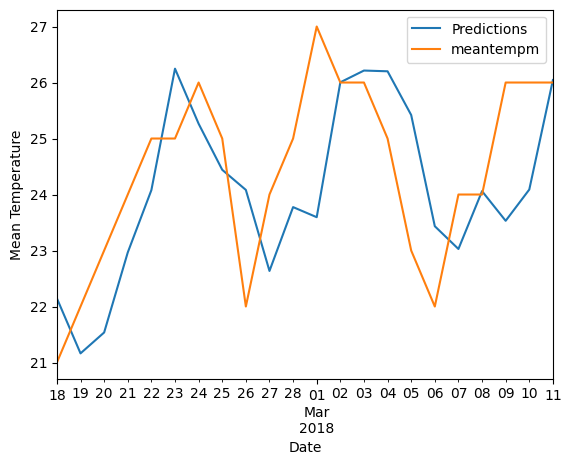

In [33]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['meantempm'].plot(legend = True) 
# Set labels for x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


In [34]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["meantempm"], predictions) 

1.4751638102047466

In [31]:
# Calculate mean squared error 
mean_squared_error(test["meantempm"], predictions) 

6.5063874833049455

<Axes: >

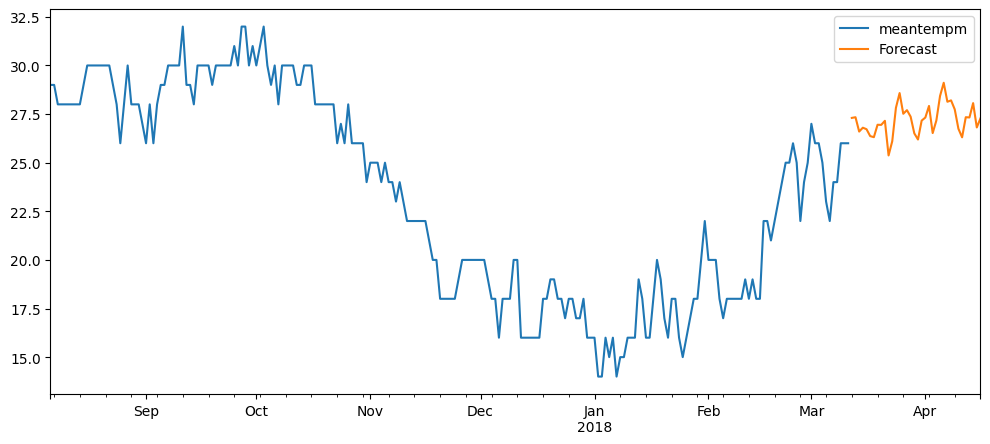

In [32]:
# Train the model on the full dataset 
model = model = SARIMAX(df['meantempm'],  
                        order = (2, 0, 0),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['meantempm'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 